**Carregar as bibliotecas necessarias**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import auth
auth.authenticate_user()

**Conectar o Google Cloud Platform**

In [ ]:
project_id = 'amiable-port-343414'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://bucket-diabetes/
gs://bucket-diabetes-ml/
gs://remote-terraform-state-files/


**Listar os arquivos que estao no bucket-diabetes do GCP**


In [ ]:
!gsutil ls gs://bucket-diabetes/ 

gs://bucket-diabetes/diabetes_012_health_indicators_BRFSS2015.parquet/
gs://bucket-diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.parquet/
gs://bucket-diabetes/diabetes_binary_health_indicators_BRFSS2015.parquet/


**Copiar os dados do bucket do GCP para o Google Colab**

In [ ]:
!gsutil -m cp -r gs://bucket-diabetes/ /content

Copying gs://bucket-diabetes/diabetes_012_health_indicators_BRFSS2015.parquet/._SUCCESS.crc...
Copying gs://bucket-diabetes/diabetes_012_health_indicators_BRFSS2015.parquet/.part-00000-5d0c22f2-eda3-49ca-976f-421560a83231-c000.snappy.parquet.crc...
Copying gs://bucket-diabetes/diabetes_012_health_indicators_BRFSS2015.parquet/.part-00004-5d0c22f2-eda3-49ca-976f-421560a83231-c000.snappy.parquet.crc...
Copying gs://bucket-diabetes/diabetes_012_health_indicators_BRFSS2015.parquet/.part-00002-5d0c22f2-eda3-49ca-976f-421560a83231-c000.snappy.parquet.crc...
Copying gs://bucket-diabetes/diabetes_012_health_indicators_BRFSS2015.parquet/.part-00001-5d0c22f2-eda3-49ca-976f-421560a83231-c000.snappy.parquet.crc...
Copying gs://bucket-diabetes/diabetes_012_health_indicators_BRFSS2015.parquet/.part-00005-5d0c22f2-eda3-49ca-976f-421560a83231-c000.snappy.parquet.crc...
Copying gs://bucket-diabetes/diabetes_012_health_indicators_BRFSS2015.parquet/.part-00003-5d0c22f2-eda3-49ca-976f-421560a83231-c000.sna

**Carregar o dataset em formato parquet**

In [ ]:
df_diabetes = pd.read_parquet('/content/bucket-diabetes/diabetes_012_health_indicators_BRFSS2015.parquet', engine='pyarrow')

**Configurar o pandas para mostrar todas as colunas do dataset**

In [ ]:
#Setar o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)
print("Numero de linhas maximo foi configurado para podermos ver todas as colunas do dataset")

Numero de linhas maximo foi configurado para podermos ver todas as colunas do dataset


In [ ]:
#Importando os dados já modificando o data type de algumas colunas. IMPORTANTE!! Otimiza o tamanho do arquivo.
#data = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
#df = pd.read_csv(data,  dtype = {"Embarked" : "category", "Survived": "category", "Parch": "int32"})

**Visualizar os 5 primeiros registos**

In [ ]:
#Exibir todo o dataframe df
df_diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,9.0,5.0,3.0
1,0.0,0.0,0.0,1.0,42.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,4.0,30.0,1.0,0.0,8.0,5.0,2.0
2,0.0,0.0,1.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
3,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,4.0,5.0
4,0.0,0.0,0.0,1.0,35.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,6.0,6.0


# **Analise Exploratoria dos Dados**

**Perguntas sobre os dados**
1. Qual e a correlacao entre variaveis preditoras e a variavel alvo?
2. Qual e a distribuicao de pacientes por classe?
3. Sera que o intervalo de valores do indice de massa corporal, idade, nivel de pressao arterial, nivel de colesterol e igual em cada uma das classes?
4. Quais os factores que influenciam na obtencao de diabetes?




**Verificar o formato do dataset**

In [ ]:
df_diabetes.shape

(229781, 22)

**Visualizar os dados e tipos de dados do dataset**

In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229781 entries, 0 to 229780
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  

**Alterar o tipo de dados do dataset**

In [ ]:
#Alterar o tipo de dados do dataset 
df_diabetes['HighBP']=df_diabetes['HighBP'].astype('int8')
df_diabetes['HighChol']=df_diabetes['HighChol'].astype('int8')
df_diabetes['CholCheck']=df_diabetes['CholCheck'].astype('int8')
df_diabetes['Smoker']=df_diabetes['Smoker'].astype('int8')
df_diabetes['Stroke']=df_diabetes['Stroke'].astype('int8')
df_diabetes['HeartDiseaseorAttack']=df_diabetes['HeartDiseaseorAttack'].astype('int8')
df_diabetes['PhysActivity']=df_diabetes['PhysActivity'].astype('int8')
df_diabetes['Fruits']=df_diabetes['Fruits'].astype('int8')
df_diabetes['Veggies']=df_diabetes['Veggies'].astype('int8')                
df_diabetes['HvyAlcoholConsump']=df_diabetes['HvyAlcoholConsump'].astype('int8')
df_diabetes['NoDocbcCost']=df_diabetes['NoDocbcCost'].astype('int8')
df_diabetes['GenHlth']=df_diabetes['GenHlth'].astype('int8')
df_diabetes['MentHlth']=df_diabetes['MentHlth'].astype('int8')
df_diabetes['DiffWalk']=df_diabetes['DiffWalk'].astype('int8')
df_diabetes['Sex']=df_diabetes['Sex'].astype('int8')
df_diabetes['Education']=df_diabetes['Education'].astype('int8')
df_diabetes['Income']=df_diabetes['Income'].astype('int8')
df_diabetes['AnyHealthcare']=df_diabetes['AnyHealthcare'].astype('int8')
df_diabetes['Age']=df_diabetes['Age'].astype('int8')
df_diabetes['PhysHlth']=df_diabetes['PhysHlth'].astype('int8')
df_diabetes['Diabetes_012']=df_diabetes['Diabetes_012'].astype('int8')

#df_diabetes = df_diabetes.astype('int8').dtypes

**Análise Estatistica Basica do dataset**

In [ ]:
df_diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,0.794813,0.060710,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,0.403839,0.238798,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**Resumo:**
* Em medias as pessoas da pesquisa tem um BMI de **28.68**
* Quase **metade** das pessoas entrevistadas fumam e comem fruta.
* **73.34 %** das pessoas entrevistadas praticam **actividades fisicas** 	
* **79.48 %** das pessoas entrevistadas comem **vegetais**
* **Quase ninguem** consume alcool de altas proporcoes (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week).	
* **94%** das pessoas entrevistadas usaram algum plano e/ou seguro de saude



**Verificar se existem registos em falta (em percentagem) no dataset**

In [ ]:
nulos=(df_diabetes.isnull().sum()/df_diabetes.shape[0])*100
nulos[nulos>0]

Series([], dtype: float64)

**Resumo:**
* Nao existem valores faltantes.

**Verificar valores unicos**

In [ ]:
for col in df_diabetes.columns:
    print(col,':', df_diabetes[col].unique(),'\n')

Diabetes_012 : [1 0 2] 

HighBP : [0 1] 

HighChol : [1 0] 

CholCheck : [1 0] 

BMI : [33. 42. 20. 27. 35. 29. 24. 21. 45. 40. 26. 30. 43. 37. 38. 19. 32. 31.
 28. 22. 25. 18. 47. 23. 39. 34. 36. 41. 44. 50. 16. 48. 72. 52. 63. 15.
 46. 51. 79. 17. 14. 49. 54. 66. 53. 92. 58. 57. 55. 70. 64. 75. 73. 60.
 77. 81. 62. 87. 71. 84. 82. 56. 67. 68. 89. 74. 98. 95. 61. 13. 59. 90.
 12. 83. 65. 91. 86. 69. 76. 80. 88. 96. 85. 78.] 

Smoker : [1 0] 

Stroke : [0 1] 

HeartDiseaseorAttack : [0 1] 

PhysActivity : [1 0] 

Fruits : [1 0] 

Veggies : [1 0] 

HvyAlcoholConsump : [0 1] 

AnyHealthcare : [1 0] 

NoDocbcCost : [0 1] 

GenHlth : [3 5 2 1 4] 

MentHlth : [ 0  4 30  3 15  1  2  5  7 20 16 10  6 14  9 25 26 12 23 29 21 18 28  8
 11 27 17 19 13 22 24] 

PhysHlth : [ 0 30 14 15 18  2  3 10  5 20 28  1 25  7  6  4  8 12 29 17 13 22 21 27
 23  9 11 26 19 16 24] 

DiffWalk : [1 0] 

Sex : [0 1] 

Age : [ 9  8 12 11 10  7  5  4  2  6 13  1  3] 

Education : [5 6 4 2 3 1] 

Income : [3 2 8 5 6 

**Resumo:**

As colunas categoricas **MentHlth e PhysHlth** possuem **alta cardinalidade**.

# **Extraindo Insights a partir dos dados (Visualizacao de Dados)**

**Analisar a Distribuicao dos dados**

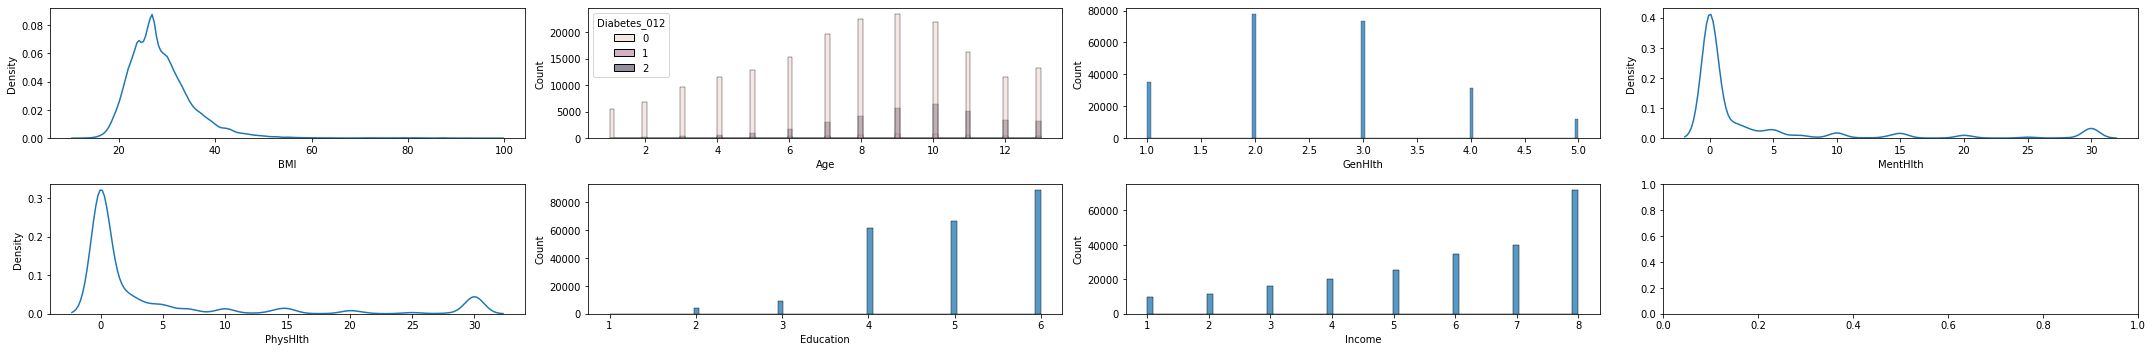

In [ ]:

f,ax=plt.subplots(nrows=2,ncols=4,figsize=(30,5));


sns.kdeplot(data=df_diabetes,x='BMI',ax=ax[0,0]);
#ax[0,0].set(title='BMI')
sns.histplot(data=df_diabetes,x='Age',ax=ax[0,1],hue='Diabetes_012');
#ax[0,1].set(title='Age')
sns.histplot(data=df_diabetes,x='GenHlth',ax=ax[0,2]);
#ax[0,2].set(title='GenHlth')
sns.kdeplot(data=df_diabetes,x='MentHlth',ax=ax[0,3]);
#ax[0,3].set(title='MentHlth')
sns.kdeplot(data=df_diabetes,x='PhysHlth',ax=ax[1,0]);
#ax[1,0].set(title='PhysHlth')
sns.histplot(data=df_diabetes,x='Education',ax=ax[1,1]);
#ax[1,1].set(title='Education')
sns.histplot(data=df_diabetes,x='Income',ax=ax[1,2]);
#ax[1,2].set(title='Income')

plt.tight_layout()
plt.show()

**1. Qual e a correlacao entre variaveis preditoras e a variavel alvo?**

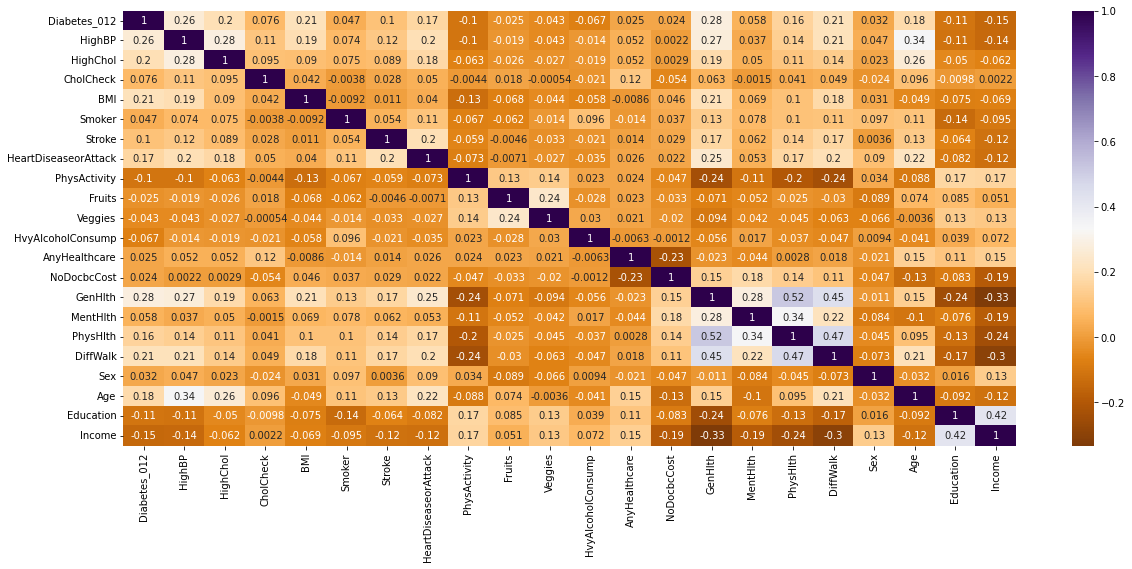

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df_diabetes.corr(),cmap='PuOr',annot=True)
plt.show()

**Resumo:**

*   Todas as variaveis possuem uma **correlacao fraca** entre elas.



**2. Qual e a distribuicao dos pacientes por classe?**

In [ ]:
balanceamento=round((df_diabetes['Diabetes_012'].value_counts()/df_diabetes['Diabetes_012'].shape[0])*100,2)

balanceamento.index=balanceamento.index.map({0:'Sem Diabetes',1: 'Pre-Diabetes',2:'Diabetes'})

balanceamento=balanceamento.to_frame().reset_index()

balanceamento.rename(columns={'index':'Tipo','Diabetes_012':'%'},inplace=True)

balanceamento

,Tipo,%
0,Sem Diabetes,82.71
1,Diabetes,15.27
2,Pre-Diabetes,2.01


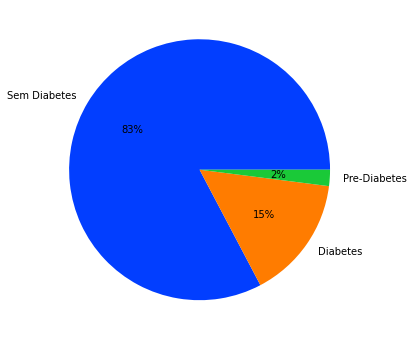

In [ ]:
plt.figure(figsize=(20,6))
colors=sns.color_palette('bright')[0:3]
plt.pie(balanceamento['%'],labels=balanceamento['Tipo'],colors=colors,autopct='%.0f%%')
plt.show()

**Resumo:**

*   **83%** dos pacientes/entrevistados **nao tem diabetes**.



**Sera que o intervalo de valores do indice de massa corporal, idade, nivel de pressao arterial, nivel de colesterol e igual em cada uma das classes?**

In [ ]:
df_sem_diabetes=df_diabetes[df_diabetes['Diabetes_012']==0]
df_pre_diabetes=df_diabetes[df_diabetes['Diabetes_012']==1]
df_com_diabetes=df_diabetes[df_diabetes['Diabetes_012']==2]

**Comparativo do Indice de massa corporal (IMC ou em ingles BMI)**

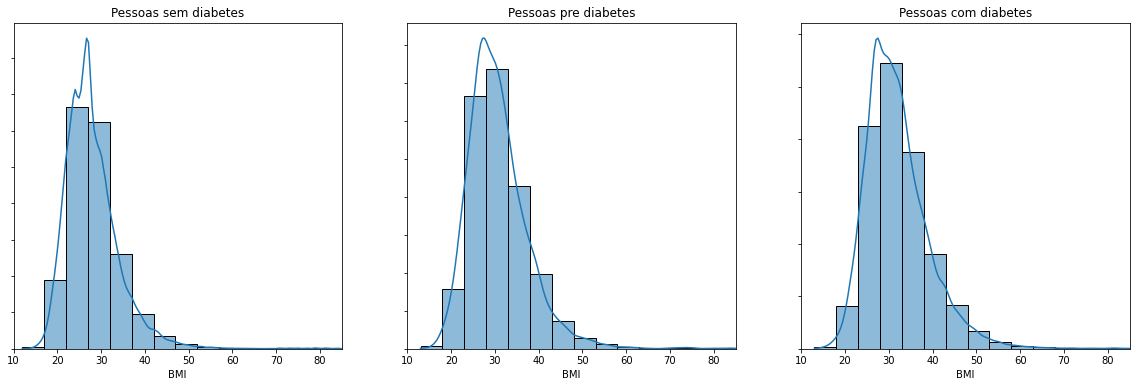

In [ ]:
fig, ax=plt.subplots(1,3,sharex=True,figsize=(20,6))

sns.histplot(ax=ax[0],data=df_sem_diabetes,x='BMI',kde=True,binwidth=5)
ax[0].set(title='Pessoas sem diabetes',yticklabels=[],ylabel=None)

sns.histplot(ax=ax[1],data=df_pre_diabetes,x='BMI',kde=True,binwidth=5)
ax[1].set(title='Pessoas pre diabetes',yticklabels=[],ylabel=None)

sns.histplot(ax=ax[2],data=df_com_diabetes,x='BMI',kde=True,binwidth=5)
ax[2].set(title='Pessoas com diabetes',yticklabels=[],ylabel=None)

plt.xlim(10,85)
plt.show()

**Resumo:**

O indice de massa corporal tem o mesmo conjunto de valores para as 3 classes envolvidas.

**Comparativo da Idade**

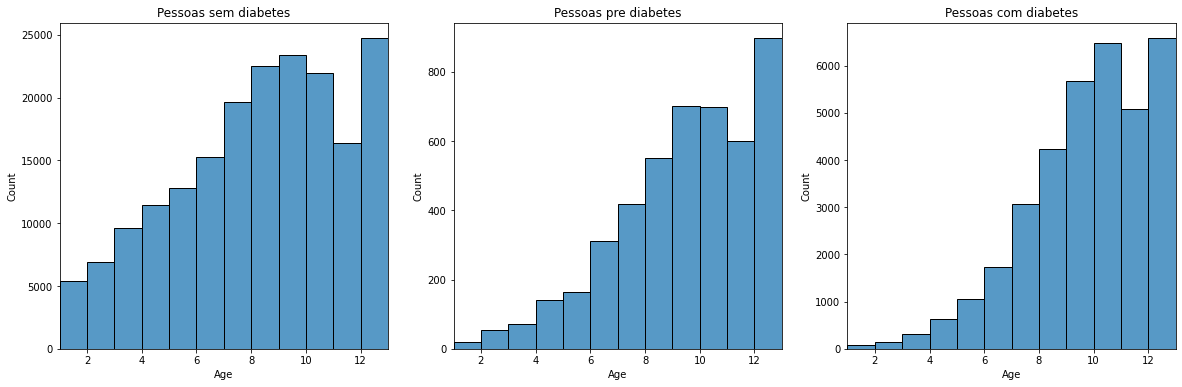

In [ ]:
fig, ax=plt.subplots(1,3,sharex=True,figsize=(20,6))

sns.histplot(ax=ax[0],data=df_sem_diabetes,x='Age',kde=False,binwidth=1)
ax[0].set(title='Pessoas sem diabetes')

sns.histplot(ax=ax[1],data=df_pre_diabetes,x='Age',kde=False,binwidth=1)
ax[1].set(title='Pessoas pre diabetes')

sns.histplot(ax=ax[2],data=df_com_diabetes,x='Age',kde=False,binwidth=1)
ax[2].set(title='Pessoas com diabetes')

plt.xlim(1,13)
plt.show()

**Resumo:**

* A maior parte das pessoas com **pre-diabetes e diabetes** estao em idade 
pertencentes a **categoria 6 em diante**.
* Nao obstante, nao chegamos a nenhuma conclusao de grau de iobtencao de diabetes em funcao da idade.

**Comparativo de pressao arterial (HighBP)**

In [ ]:
(df_sem_diabetes.HighBP.value_counts()/df_sem_diabetes.shape[0])*100


0    60.482492
1    39.517508
Name: HighBP, dtype: float64

In [ ]:
(df_pre_diabetes.HighBP.value_counts()/df_pre_diabetes.shape[0])*100


1    62.907755
0    37.092245
Name: HighBP, dtype: float64

In [ ]:
(df_com_diabetes.HighBP.value_counts()/df_com_diabetes.shape[0])*100

1    75.234351
0    24.765649
Name: HighBP, dtype: float64

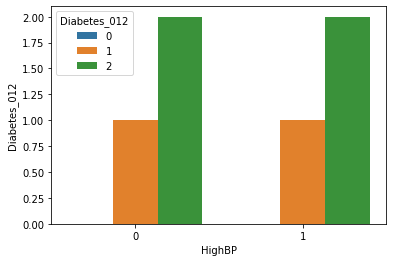

In [ ]:
sns.barplot(data=df_diabetes,
            x='HighBP',
            y='Diabetes_012',
            hue='Diabetes_012',
          )


# **Modelagem preditiva**

**Carregar as bibliotecas necessarias**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB

**Separar os dados em treino e teste**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_diabetes.drop(['Diabetes_012'],axis=1),df_diabetes['Diabetes_012'],test_size=0.25,random_state=1)

**Visualizar o formato dos dados**

In [ ]:
X_train.shape,X_test.shape

((172335, 21), (57446, 21))

**Instanciar e treinar o Modelo Baseline**

In [ ]:
#Definir o modelo
clf_nb=GaussianNB()
clf_nb.fit(X_train,y_train)

GaussianNB()

**Efectuar previsoes com base em dados desconhecidos**

In [ ]:
previsoes=clf_nb.predict(X_test)

**Efectar previsoes usando baseline**

In [ ]:
def avaliar_algoritmo(df_real,df_predito):
    #Matriz de Confusao
    #cm=confusion_matrix(y_test,previsoes)
    cm=pd.crosstab(y_test,previsoes,rownames=['Real'],colnames=['Predito'],margins=True)
    print('Matriz de Confusao:\n')
    print(cm,'\n')
    print('Classification Report:\n')
    #Avaliar o modelo base
    print(classification_report(previsoes,y_test))

In [ ]:
avaliar_algoritmo(y_test,previsoes)

Matriz de Confusao:

Predito      0    1      2    All
Real                             
0        37400  145   9913  47458
1          658   11    502   1171
2         3770   42   5005   8817
All      41828  198  15420  57446 

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     41828
           1       0.01      0.06      0.02       198
           2       0.57      0.32      0.41     15420

    accuracy                           0.74     57446
   macro avg       0.46      0.42      0.42     57446
weighted avg       0.73      0.74      0.72     57446



**Resumo:**:
* O modelo base teve uma acuracia de **0.74** e preve a **classe 1 e 2 com uma acuracia (f1 score) inferior a 50%**.

**Instanciar e treinar o modelo Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf=RandomForestClassifier()
clf_rf.fit(X_train,y_train)

RandomForestClassifier()

**Efectuar previsoes**

In [ ]:
previsoes=clf_rf.predict(X_test)

**Avaliar o modelo**

In [ ]:
avaliar_algoritmo(y_test,previsoes)

Matriz de Confusao:

Predito      0   1     2    All
Real                           
0        45662  66  1730  47458
1         1029   1   141   1171
2         7125  14  1678   8817
All      53816  81  3549  57446 

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.85      0.90     53816
           1       0.00      0.01      0.00        81
           2       0.19      0.47      0.27      3549

    accuracy                           0.82     57446
   macro avg       0.38      0.44      0.39     57446
weighted avg       0.91      0.82      0.86     57446



**Visualizar a importancia das variaveis preditoras na previsao da variavel alvo**

In [ ]:
#Variaveis que afectam o modelo (Escolher acima 3%)
pd.DataFrame(clf_rf.feature_importances_.reshape(1,-1),columns=X_train.columns).T.sort_values(by=0,ascending=False)*100

,0
BMI,18.426225
Age,12.333248
Income,10.112030
PhysHlth,8.529593
Education,7.265321
GenHlth,6.537013
MentHlth,6.362040
HighBP,3.627002
Fruits,3.478912
Smoker,3.473712


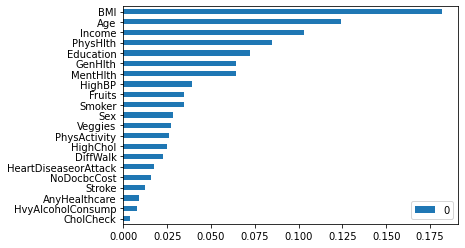

In [ ]:
#plt.figure(figsize=(30,6))
pd.DataFrame(clf_rf.feature_importances_.reshape(1,-1),columns=X_train.columns).T.sort_values(by=0,ascending=True).plot(kind='barh')
#plt.show()

**Excluir colunas em que o grau de importancia para o modelo esta abaixo de 3%**

In [ ]:
feature_imp=pd.DataFrame(clf_rf.feature_importances_.reshape(1,-1),columns=X_train.columns).T.sort_values(by=0,ascending=False)

colunas=feature_imp[feature_imp[0]>0.03].index

colunas

Index(['BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth',
       'HighBP', 'Smoker', 'Fruits'],
      dtype='object')

# **Tratar Classes Desbalanceadas**

**Importar as principais tecnicas de under_sampling e over_sampling**

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

**Separar os dados em varuaveis preditoras e variaveis alvo**

In [ ]:
X=df_diabetes[colunas]
y=df_diabetes['Diabetes_012']

**NearMiss**

In [ ]:
#Instanciar o NearMiss
nr=NearMiss()

#Efectuar o resample
X_near,y_near=nr.fit_resample(X,y)

**Contar o numero de registos por classe**

In [ ]:
np.bincount(y_near)

array([4629, 4629, 4629])

**Separar os dados em treino e teste**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_near,y_near,test_size=0.25)

NameError: ignored

**Treinar o modelo com dados balanceados pelo NearMiss**

In [ ]:
clf_rf.fit(X_train[colunas],y_train)

RandomForestClassifier()

**Prever a classe usando dados de teste**

In [ ]:
previsoes=clf_rf.predict(X_test[colunas])

**Avaliar o modelo**

In [ ]:
avaliar_algoritmo(y_test,previsoes)

Matriz de Confusao:

Predito     0    1     2   All
Real                          
0         917   78   133  1128
1         219  809   172  1200
2         323  110   711  1144
All      1459  997  1016  3472 

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.63      0.71      1459
           1       0.67      0.81      0.74       997
           2       0.62      0.70      0.66      1016

    accuracy                           0.70      3472
   macro avg       0.70      0.71      0.70      3472
weighted avg       0.72      0.70      0.70      3472



**SMOTE**

**Instanciar o smote**

In [ ]:
#strategic=0.5
#sampling_strategy = {0: 190055, 1: 10000, 2: 10000}
smt=SMOTE(random_state=1)

**Efectuar o resample**

In [ ]:
X_over,y_over=smt.fit_resample(X,y)

**Verificar se as classes estao balanceadas**

In [ ]:
np.bincount(y_over)

array([190055, 190055, 190055])

**Dividir os dados em treino e teste**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_over,y_over,test_size=0.25,random_state=1)

**Treinar o modelo usando as colunas com relevancia superior a 3%**

In [ ]:
clf_rf.fit(X_train[colunas],y_train)

RandomForestClassifier()

**Prever a classe usando as colunas com relevancia superior a 3% nos dados de teste**

In [ ]:
previsoes=clf_rf.predict(X_test[colunas])

**Avaliar o modelo**

In [ ]:
avaliar_algoritmo(y_test,previsoes)

Matriz de Confusao:

Predito      0      1      2     All
Real                                
0        36363   2178   8888   47429
1          802  46198    890   47890
2         5173   1492  40558   47223
All      42338  49868  50336  142542 

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.86      0.81     42338
           1       0.96      0.93      0.95     49868
           2       0.86      0.81      0.83     50336

    accuracy                           0.86    142542
   macro avg       0.86      0.86      0.86    142542
weighted avg       0.87      0.86      0.86    142542



# **PYCARET**

**Instalar o pycaret**

In [ ]:
!pip install -q pycaret #==2.3.6

In [ ]:
#print('Pycaret:',pycaret.__version__)
#print('Scikit:',sklearn.__version__)

In [ ]:
#!pip install scikit-learn==0.23.2

**Importar a biblioteca para tarefa de classificacao**

In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
#X_over.Education.unique()
X_over.GenHlth.unique() 

array([3, 5, 2, 1, 4], dtype=int8)

**Configurar as tecnicas de pre-processamento dos dados**

Experimento 1

In [ ]:
#Usando SMOTE
clf_diabetes=setup(data=pd.concat([X_over,y_over],axis=1),
                   target='Diabetes_012',
                   numeric_features=['BMI','Age','Income','PhysHlth','GenHlth','HighBP','Fruits','Smoker','Education'],
                   high_cardinality_features=['MentHlth'],
                   use_gpu=True,
                   normalize=True,
                   session_id=123
                   )

,Description,Value
0,session_id,123
1,Target,Diabetes_012
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(570165, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,True


Exeperimento 2

In [ ]:
X_over['GenHlth']=X_over['GenHlth'].astype('category')

In [ ]:
#Usando o SMOTE
clf_diabetes=setup(data=pd.concat([X_over,y_over],axis=1),#pd.concat([df_diabetes[colunas],df_diabetes['Diabetes_012']],axis=1),
                   target='Diabetes_012',
                   numeric_features=['BMI','Age','Income'],
                   categorical_features=['PhysHlth','HighBP','Fruits','Smoker'],
                   ordinal_features={'Education':[1,2,3,4,5,6],'GenHlth':[1,2,3,4,5]},
                   high_cardinality_features=['MentHlth'],
                   use_gpu=True,
                   normalize=True,
                   session_id=123#,
                   #fix_imbalance=True#, fix_imbalance_method='SMOTE' #adasyn1
                   )
#GenHlth: estado de saude: 1- excelente e 5 - ruim
#PhysHlth: nos ultimos 30 dias quantos dias tive problemas
#DiffWalk: dificuldades de subir escadas
#Stoke: ja teve derrame
#Age:1 = 18-24, 9 = 60-64, 13 = 80 ou mais 

,Description,Value
0,session_id,123
1,Target,Diabetes_012
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(570165, 11)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,4
8,Ordinal Features,True
9,High Cardinality Features,True


**Visualizar os dados transformados**

In [ ]:
get_config("X_train").head()

,BMI,Age,Education,GenHlth,MentHlth,Income_1,Income_2,Income_3,Income_4,Income_5,...,PhysHlth_30,PhysHlth_4,PhysHlth_5,PhysHlth_6,PhysHlth_7,PhysHlth_8,PhysHlth_9,HighBP_0,Fruits_0,Smoker_0
374741,0.381704,-0.953676,1.0,3.0,-1.518724,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
538810,-0.170481,0.862182,5.0,1.0,0.701298,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79930,-0.735850,-0.590504,5.0,0.0,-1.526985,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
169754,-1.301220,1.588526,5.0,1.0,0.701298,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382625,-0.453165,1.588526,5.0,1.0,0.701298,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Escolher o melhor algoritmo**

In [ ]:
best_model=compare_models(include=['lightgbm','lr','svm','knn','rf'],fold=5)
#best1_model=compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8334,0.9448,0.8335,0.8330,0.8320,0.7501,0.7513,66.8600
et,Extra Trees Classifier,0.8203,0.9369,0.8203,0.8187,0.8187,0.7304,0.7311,81.7267
dt,Decision Tree Classifier,0.7900,0.8577,0.7900,0.7877,0.7878,0.6849,0.6858,3.2333
knn,K Neighbors Classifier,0.7367,0.8824,0.7367,0.7362,0.7309,0.6050,0.6096,268.6500
lightgbm,Light Gradient Boosting Machine,0.6337,0.8200,0.6337,0.6331,0.6330,0.4506,0.4509,11.4100
gbc,Gradient Boosting Classifier,0.5789,0.7679,0.5789,0.5812,0.5793,0.3683,0.3688,163.0800
ada,Ada Boost Classifier,0.5400,0.7277,0.5399,0.5395,0.5381,0.3099,0.3109,17.5200
lr,Logistic Regression,0.5251,0.7140,0.5251,0.5230,0.5220,0.2876,0.2887,84.1167
lda,Linear Discriminant Analysis,0.5235,0.7128,0.5234,0.5214,0.5203,0.2852,0.2864,3.0800
ridge,Ridge Classifier,0.5212,0.0000,0.5212,0.5195,0.5147,0.2818,0.2847,0.9333


**Criar o modelo**

In [ ]:
modelo = create_model('rf',fold=5)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                       
CV-Val 0       0.4867  0.0  0.4865  0.5189  0.4301  0.2299  0.2542
       1       0.4884  0.0  0.4882  0.5153  0.4304  0.2325  0.2565
       2       0.4926  0.0  0.4925  0.5238  0.4281  0.2388  0.2682
       3       0.4902  0.0  0.4901  0.5022  0.4467  0.2352  0.2544
       4       0.4984  0.0  0.4983  0.5031  0.4694  0.2475  0.2612
       Mean    0.4913  0.0  0.4911  0.5127  0.4409  0.2368  0.2589
       Std     0.0041  0.0  0.0041  0.0086  0.0157  0.0061  0.0053
Train  NaN     0.4912  0.0  0.4910  0.5258  0.4317  0.2366  0.2664

Experimento 1: **RF 84.70% --> 84.82 apos tunning**

Experimento 2: **RF 84.41%**

**Optimizar o modelo**

In [ ]:
params_rf={
    'n_estimators': [100, 250],
    'max_depth': [ 2, 4, 6,None]
}

params_svm={
    'kernel': ['poly', 'rbf'],
    'C': [ 1, 0.5, 5]
}


In [ ]:
#Visualizar os paramteros do modelo
#modelo.get_params().keys()
best_model.get_params().keys()

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
modelo_optimizado=tune_model(best_model,fold=5,custom_grid=params_rf)
#modelo_optimizado=tune_model(modelo,fold=5,custom_grid=params_svm)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:47:53
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,SVM - Linear Kernel


,Split,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: ignored

**Efectuar previsoes**

In [ ]:
#del best_model

In [ ]:
#Prever usando a porcao de testes
predict_model(modelo_optimizado)

**Finalizar o modelo (treinar o modelo com todos os dados disponiveis)**

In [ ]:
modelo_final=finalize_model(modelo_optimizado)

In [ ]:
#del modelo_optimizado
modelo_final

NameError: ignored

**Visualizar a acuracia, o erro, matriz de confusao e classification report**

In [ ]:
#evaluate_model(modelo_final)
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Visualizar o erro**

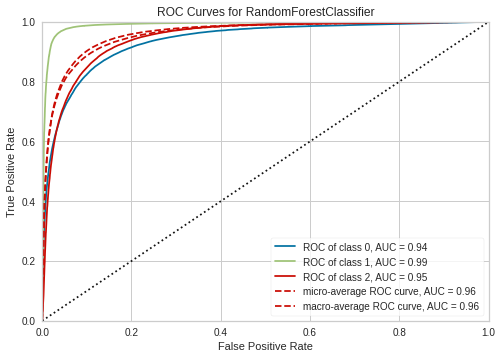

In [ ]:
#plot_model(modelo_final, plot = 'error')
plot_model(best_model, plot = 'auc')

**Matriz de confusao**

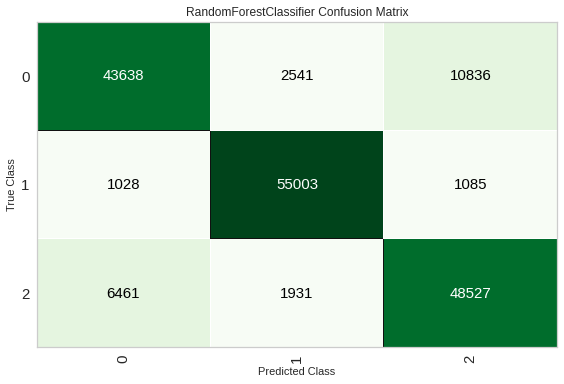

In [ ]:
#plot_model(modelo_final, plot = 'confusion_matrix')
plot_model(best_model, plot = 'confusion_matrix')

**Report Classification (precision e recall)**

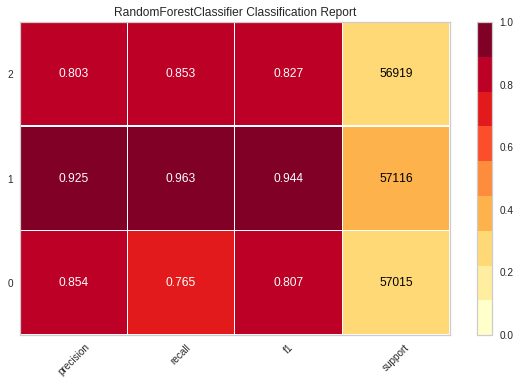

In [ ]:
#plot_model(modelo_final, plot = 'class_report')
plot_model(best_model, plot = 'class_report')

**Salvar o modelo em disco**

In [ ]:
#save_model(modelo_final,'RF_model_diabetes.pkl')
save_model(best_model,'RF_model_diabetes')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['BMI', 'Age',
                                                           'Income', 'PhysHlth',
                                                           'GenHlth', 'HighBP',
                                                           'Fruits', 'Smoker',
                                                           'Education'],
                                       target='Diabetes_012',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strate...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                     

**Copiar o modelo salvo para o bucket do GCP**

In [ ]:
!gsutil -m cp -r /content/RF_model_diabetes.pkl gs://bucket-diabetes-ml/

Copying file:///content/RF_model_diabetes.pkl [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

/ [1/1 files][  1.1 GiB/  1.1 GiB] 100% Done  89.8 MiB/s ETA 00:00:00           
Operation completed over 1 objects/1.1 GiB.                                      


**Listar os arquivos do bucket-diabetes-ml do GCP**

In [ ]:
!gsutil ls gs://bucket-diabetes-ml/ 

gs://bucket-diabetes-ml/RF_model_diabetes.pkl
